In [4]:
from groupy import config, Group
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

In [91]:
# get group; if don't know group_id can filter by name (but name liable to change)
rip = Group.list().filter(group_id='13678029')[0] # rip city
# rip = Group.list().filter(group_id='24338846')[0] # stag city

In [92]:
# make a dict to go from user_ids to current name
rip_names = list(map(str, rip.members()))
rip_ids = list(map(lambda x: str(x.user_id), rip.members()))
rip_dict = dict(zip(rip_ids, rip_names))
rip_dict['system'] = 'system'
# find and change accordingly
rip_dict['354536'] = 'ripbot'
# rip_dict['356381'] = 'fitbot'

In [93]:
rip.message_count

11573

In [94]:
# get all messages (11,000+)
messages = rip.messages()
while messages.iolder():
    pass

In [95]:
# get info about messages
m_times = [m.created_at for m in messages]
m_users = [m.user_id for m in messages]
m_likes = [len(m.likes()) for m in messages]
m_text = [str(m.text).strip() for m in messages]

In [96]:
# put into dataframe
df = pd.DataFrame({'user_id':m_users}, index=m_times)
df['name'] = df['user_id'].map(rip_dict)
df['likes'] = m_likes
df['text'] = m_text
df['chars'] = df['text'].map(lambda x: len(x))

In [97]:
df.head()

,user_id,name,likes,text,chars
2016-10-30 20:35:13,38649108,Patrick Beckett,3,Homecoming was already a struggle @AT,37
2016-10-30 20:34:19,19577557,Touches,6,"""I got hit by a d that came out of nowhere""",43
2016-10-30 20:28:05,22942080,AT,0,Have fun explaining that one at school for the...,64
2016-10-30 19:50:23,26742948,Augirth,0,Faceblock,9
2016-10-30 19:46:54,38649108,Patrick Beckett,7,"When frisbee meets eye, at least I got the d t...",51


In [98]:
# calc some stats
stats = pd.DataFrame({'messages':df['name'].value_counts()})
stats.index.rename('name', inplace=True)
sums = df.groupby(['name']).sum()

stats = stats.merge(sums, left_index=True, right_index=True)
stats['like_per_m'] = stats['likes'] / stats['messages']
stats['like_per_char'] = stats['likes'] / stats['chars']

In [99]:
num_m = stats['messages'].sum()
num_l = stats['likes'].sum()

In [100]:
stats['perc_m'] = stats['messages'] / num_m * 100
stats['perc_l'] = stats['likes'] / num_l * 100

In [106]:
stats.sort_values('messages', ascending=False)

,messages,likes,chars,like_per_m,like_per_char,perc_m,perc_l
name,,,,,,,
Touches,1359,1101,51049,0.810155,0.021568,12.966320,10.757206
Augirth,1067,983,38135,0.921275,0.025777,10.180326,9.604299
gilbert mcintire,1010,966,48415,0.956436,0.019952,9.636485,9.438202
Austin Kelly,982,978,48128,0.995927,0.020321,9.369335,9.555447
boobs,481,474,19977,0.985447,0.023727,4.589257,4.631168
AT,436,418,13612,0.958716,0.030708,4.159908,4.084025
Kyle Barton,371,303,17754,0.816712,0.017067,3.539739,2.960430
system,356,222,15930,0.623596,0.013936,3.396622,2.169028
Patrick Elstead,344,390,16633,1.133721,0.023447,3.282130,3.810454


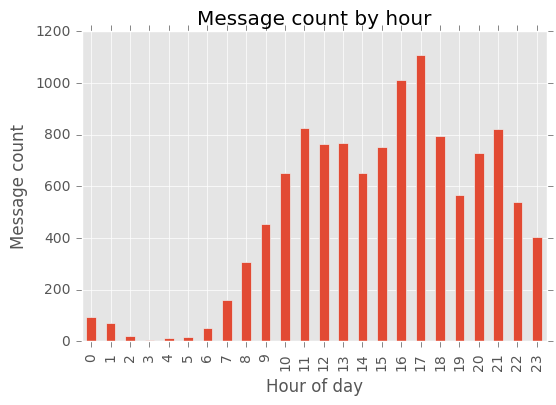

In [102]:
# do some plotting
ax = df.groupby([df.index.hour])['user_id'].count().plot(kind='bar')
ax.set_ylabel('Message count')
ax.set_xlabel('Hour of day')
ax.set_title('Message count by hour')

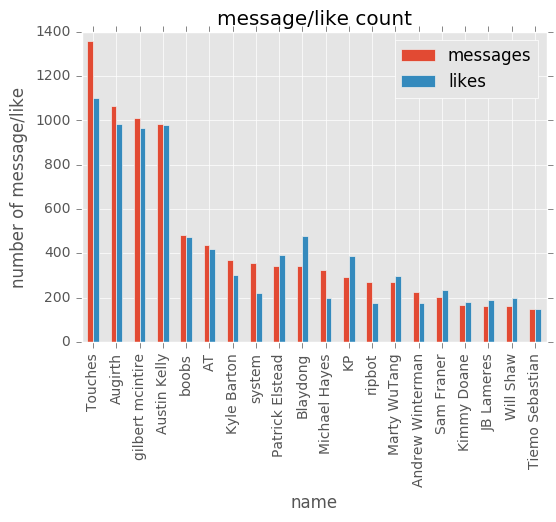

In [105]:
ax2 = stats[['messages', 'likes']].sort_values('messages', ascending=False).head(20).plot(kind='bar', stacked=False)
ax2.set_ylabel('number of message/like')
ax2.set_title('message/like count')